## Importing Data and Libraries/Modules

In [1]:
#Importing Liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Code to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Code to display all columns 
pd.set_option('display.max_columns', None)

In [2]:
# Import data
df = pd.read_csv('train.csv')

In [3]:
# Viewing data
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Viewing Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

In [5]:
# Replacing NaN values because, as per the data dictionary, the nan values have meaning

# FireplaceQu - Converting NA values to 'No_fireplace'. 
df['FireplaceQu'].fillna('No_fireplace', inplace = True)

# GarageType - Converting NA values to 'No_garage'. 
df['GarageType'].fillna('No_Garage', inplace = True)

# GarageQual - Converting NA values to 'No_garage'. 
df['GarageQual'].fillna('No_Garage', inplace = True)

# GarageCond - Converting NA values to 'No_garage'. 
df['GarageCond'].fillna('No_Garage', inplace = True)

# GarageFinish - Converting NA values to 'No_garage'. 
df['GarageFinish'].fillna('No_Garage', inplace = True)

# GarageYrBlt - Converting NA values to 'No_garage'. 
df['GarageYrBlt'].fillna('No_Garage', inplace = True)

# BsmtFinType2 - Converting NA values to 'No_basement'. 
df['BsmtFinType2'].fillna('No_basement', inplace = True)  

# BsmtQual - Converting NA values to 'No_basement'. 
df['BsmtQual'].fillna('No_basement', inplace = True) 

# BsmtCond - Converting NA values to 'No_basement'. 
df['BsmtCond'].fillna('No_basement', inplace = True) 

# BsmtExposure - Converting NA values to 'No_basement'. 
df['BsmtExposure'].fillna('No_basement', inplace = True) 

# BsmtFinType1 - Converting NA values to 'No_basement'. 
df['BsmtFinType1'].fillna('No_basement', inplace = True) 

# LotFrontage - imputing with the mean. 
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True) 

# Fence - Converting NA values to 'No_basement'. 
df['Fence'].fillna('No_Fence', inplace = True) 

In [6]:
# Droping features with high number of NA items that dont have meaning as per the data dictionary
# Droping variables that are skewed, where atleast 90% of the data belongs to one category

to_drop = ['Alley', 'PoolQC', 'MiscFeature','Id','Street', 'Utilities', 'LandSlope', 'Heating', 'CentralAir',
           'Electrical', 'PavedDrive', 'LandContour','Condition2', 'RoofMatl','BsmtCond', 'Functional', 'GarageYrBlt',
           'GarageQual', 'GarageCond']

df = df.drop(to_drop, 1)

In [7]:
# Imputing na with 'MasVnrType' with mode since its a categorical variable
df['MasVnrType'].fillna('None', inplace = True)

# imputing 'MasVnrArea' with median since there are outliers
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True)

In [8]:
# Viewing remaning variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

## Explorator data analysys

<AxesSubplot:xlabel='SalePrice'>

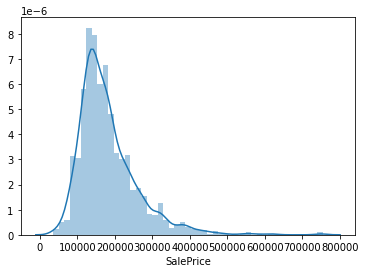

In [9]:
# Viewing the distribution of the sales
sns.distplot(df['SalePrice'])

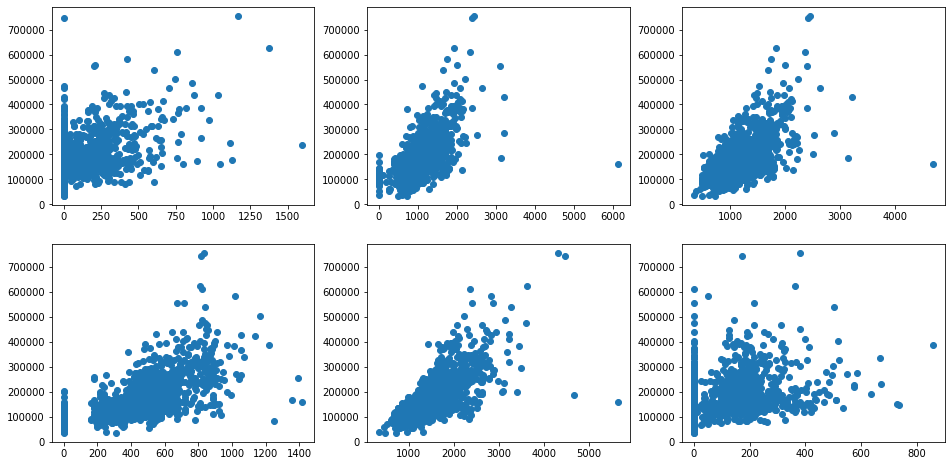

In [10]:
# Plotting a scatter plot against various variables to check if theres a linear relationship
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df['MasVnrArea'],df['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df['TotalBsmtSF'],df['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df['SalePrice'])


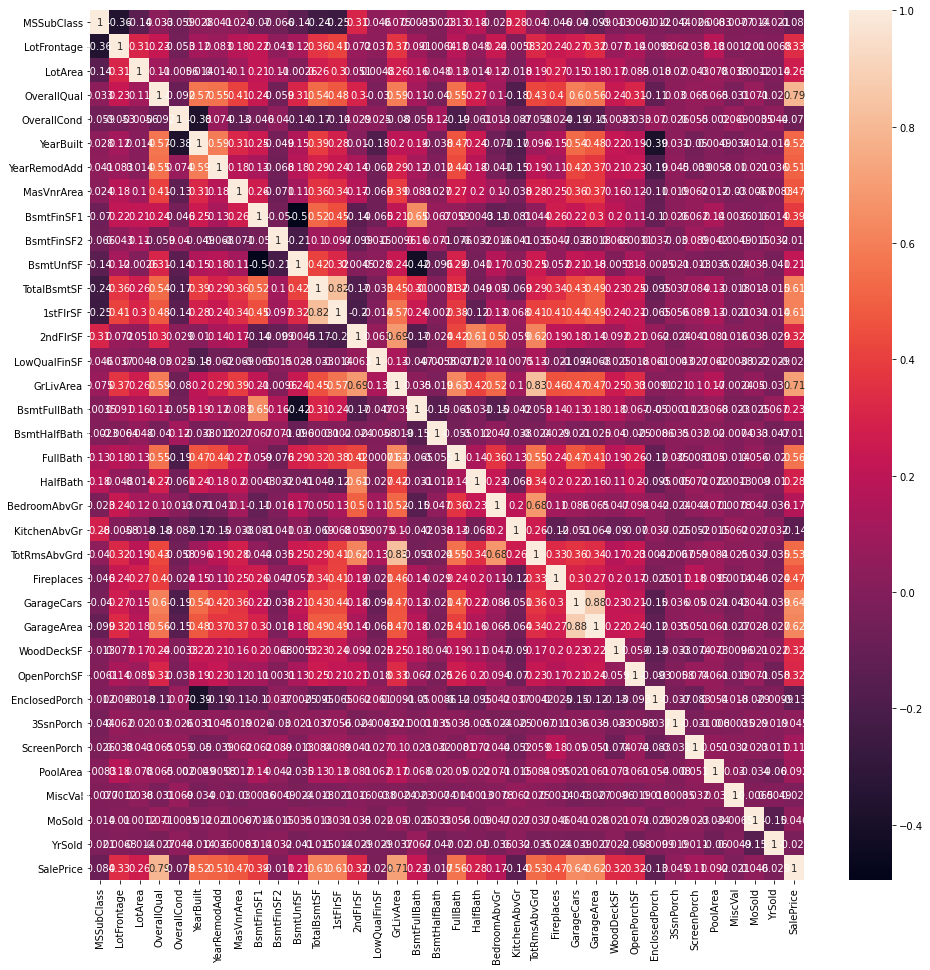

In [11]:
# Plotting a heat map of all the variables
plt.figure(figsize=(16,16))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

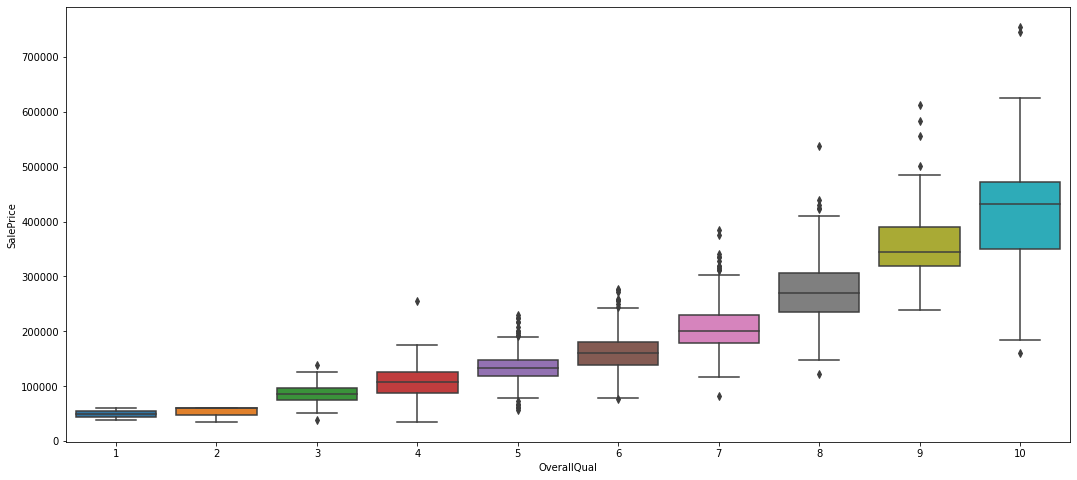

In [12]:
# Plotting The 'OverallQual' against the sales price
plt.figure(figsize=(18, 8))
sns.boxplot(x=df.OverallQual, y=df.SalePrice)

#### Higher the Quality higher the price <br><br>

## Data Preprocessing

#### Outlier Treatment

In [13]:
# Viewing distribution of sales price
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
# Using IQR to identify outliers
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

84025.0


In [15]:
# Setting Lower and upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print('Lower Limit = ',lower_limit)
print('Upper Limit = ',upper_limit)

Lower Limit =  3937.5
Upper Limit =  340037.5


In [16]:
# Removing Values that are beyond the limit
df = df[df['SalePrice'] > lower_limit]
df = df[df['SalePrice'] < upper_limit]

#### Creating Dummy Variables 

In [17]:
# Code to extract catagorical variables  to convert to dummies
# This lakes a list of all variables that are of the type 'object'
# All categorical are 'object' types.

to_dummies = []
def cat_var(x):
    
    for l in x:
        if x[l].dtype == 'O':
            to_dummies.append(l)
    return to_dummies

In [18]:
# columns with catogorical variables
cat_var(df)

#to_dummies

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'Fence',
 'SaleType',
 'SaleCondition']

In [19]:
# Convert all categorical variables into dummy  variables
df_dummies = pd.get_dummies(df[to_dummies], drop_first=True)
df_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,

In [20]:
# combining the original df and dummies into one dataframe
df = pd.concat((df, df_dummies), axis = 1)

# Dropping the original categorical cilumns that were converted to dummies
df = df.drop(to_dummies, 1)

# Viewing dataframe
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [21]:
# Splitting the data into train and test set
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 101)

#### Applying standardization to data

In [22]:
# Using standardization Since its required for regularization
scalar = StandardScaler()

a = df_train.columns
df_train[a] = scalar.fit_transform(df_train)
df_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
66,-0.856218,0.009799,1.043967,0.794112,-0.522185,-0.003495,0.234457,1.209768,1.123048,-0.293863,1.122517,2.223874,2.978519,-0.799162,-0.120874,1.500602,1.140668,-0.246420,0.861105,-0.753000,0.172675,-0.201484,0.380199,0.664666,0.390222,0.560143,1.704412,-0.669114,-0.373298,-0.11425,-0.262494,-0.059185,-0.108652,0.263109,1.632109,0.147797,-0.225176,-0.104116,0.523916,-0.418832,-0.174318,-0.090045,0.760447,-0.252365,-0.179688,-0.059895,0.613501,-0.042314,-0.104116,-0.202312,-0.154233,-0.340078,-0.199907,-0.284885,-0.240117,-0.174318,-0.11256,-0.190029,2.338420,-0.066995,-0.238028,-0.160202,-0.184921,-0.284885,-0.131426,-0.235925,-0.204694,-0.256348,-0.11256,-0.165977,-0.090045,-0.238028,-2.457180,11.784524,-0.127862,-0.090045,-0.138296,-0.042314,-0.066995,-0.148047,-0.182321,-0.171577,-0.2848

In [23]:
# Applying standardization to test set
b = df_test.columns
df_test[b] = scalar.transform(df_test)
df_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
341,-0.856218,-0.444426,-0.221988,-1.524004,-1.415648,-0.672053,-1.661751,-0.555352,-0.975122,-0.293863,0.378803,-0.757834,-0.817566,-0.799162,-0.120874,-1.318978,-0.811026,-0.24642,-1.002679,-0.753000,-1.082024,-0.201484,-1.577361,-0.914445,-0.995996,-0.813928,1.290937,-0.669114,0.026164,-0.11425,-0.262494,-0.059185,-0.108652,1.006592,0.879914,-1.487455,-0.225176,9.604686,-1.908705,-0.418832,-0.174318,-0.090045,0.760447,-0.252365,-0.179688,-0.059895,0.613501,-0.042314,-0.104116,-0.202312,-0.154233,-0.340078,-0.199907,-0.284885,-0.240117,-0.174318,-0.11256,-0.190029,-0.427639,-0.066995,-0.238028,-0.160202,-0.184921,-0.284885,-0.131426,-0.235925,4.885352,-0.256348,-0.112560,-0.165977,-0.090045,4.201190,-2.457180,-0.084857,-0.127862,-0.090045,-0.138296,-0.042314,-0.066995,-0.148047,-0.182321,-

#### Splitting Data to X and y

In [24]:
# Splitting data to X_train and y_train
X_train = df_train.drop('SalePrice', 1)
y_train = df_train['SalePrice']

In [25]:
# Splitting test set to X_test and y_test
X_test = df_test.drop('SalePrice', 1)
y_test = df_test['SalePrice']

#### Feature selelction using RFE

In [26]:
# Building regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with a hyper-perameter of 25 variables
rfe = RFE(lm, 25)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=25, step=1, verbose=0)

In [27]:
# Viewing how the columns have been treated by rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 123),
 ('LotFrontage', False, 3),
 ('LotArea', False, 19),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 31),
 ('MasVnrArea', False, 142),
 ('BsmtFinSF1', False, 21),
 ('BsmtFinSF2', False, 24),
 ('BsmtUnfSF', False, 25),
 ('TotalBsmtSF', False, 13),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 27),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 133),
 ('FullBath', False, 40),
 ('HalfBath', False, 81),
 ('BedroomAbvGr', False, 102),
 ('KitchenAbvGr', False, 135),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', False, 46),
 ('GarageCars', True, 1),
 ('GarageArea', False, 77),
 ('WoodDeckSF', False, 23),
 ('OpenPorchSF', False, 90),
 ('EnclosedPorch', False, 169),
 ('3SsnPorch', False, 99),
 ('ScreenPorch', False, 22),
 ('PoolArea', False, 91),
 ('MiscVal', False, 92),
 ('MoSold', False, 167),
 ('YrSold', False, 76),
 ('MSZoning_FV', False, 44),
 ('MSZo

In [28]:
# Extracting RFE chosen variables
cols_rfe = X_train.columns[rfe.support_]
print(cols_rfe)
X_train_rfe = df_train[cols_rfe]

Index(['OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'GarageCars', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'ExterQual_Gd', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'FireplaceQu_No_fireplace', 'SaleType_New', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')


## <br> Model Building

#### Model 1

In [29]:
# Adding constant to build model
X_train_rfe_1 = sm.add_constant(X_train_rfe)


# Creating SM linear model
lr1 = sm.OLS(y_train, X_train_rfe_1).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     252.2
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:32:58   Log-Likelihood:                -517.96
No. Observations:                1119   AIC:                             1088.
Df Residuals:                    1093   BIC:                             1218.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [30]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

calculateVIF(X_train_rfe)

,Features,VIF
5,GrLivArea,112.24
4,2ndFlrSF,87.66
24,SaleCondition_Partial,70.76
22,SaleType_New,70.42
3,1stFlrSF,65.75
20,KitchenQual_TA,8.46
19,KitchenQual_Gd,7.05
15,HouseStyle_1Story,3.38
0,OverallQual,2.96
2,YearBuilt,2.60


#### Model 2

In [31]:
# Droping variables with high p-value
X_train_new = X_train_rfe.drop(['GrLivArea'], 1)

# Add a constant
X_train_rfe2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_rfe2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     262.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:32:58   Log-Likelihood:                -518.49
No. Observations:                1119   AIC:                             1087.
Df Residuals:                    1094   BIC:                             1212.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [32]:
# Checking VIF of new model
calculateVIF(X_train_new)

,Features,VIF
23,SaleCondition_Partial,70.76
21,SaleType_New,70.42
19,KitchenQual_TA,8.46
18,KitchenQual_Gd,7.05
4,2ndFlrSF,3.58
14,HouseStyle_1Story,3.33
0,OverallQual,2.96
2,YearBuilt,2.55
15,ExterQual_Gd,2.46
3,1stFlrSF,2.08


#### Model 3

In [33]:
# Droping variables with high p-value
X_train_new = X_train_rfe.drop(['GrLivArea','SaleCondition_Partial' ], 1)

# Add a constant
X_train_rfe3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_rfe3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     268.9
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:32:58   Log-Likelihood:                -527.97
No. Observations:                1119   AIC:                             1104.
Df Residuals:                    1095   BIC:                             1224.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [34]:
# Checking VIF of new model
calculateVIF(X_train_new)

,Features,VIF
19,KitchenQual_TA,8.30
18,KitchenQual_Gd,6.92
4,2ndFlrSF,3.57
14,HouseStyle_1Story,3.32
0,OverallQual,2.95
2,YearBuilt,2.55
15,ExterQual_Gd,2.46
3,1stFlrSF,2.08
17,KitchenQual_Fa,2.02
21,SaleType_New,1.87


#### Model 4

In [35]:
# Droping variables with high p-value
X_train_new = X_train_rfe.drop(['GrLivArea','SaleCondition_Partial', 'KitchenQual_TA'], 1)

# Add a constant
X_train_rfe4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_rfe4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     266.9
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:32:58   Log-Likelihood:                -552.95
No. Observations:                1119   AIC:                             1152.
Df Residuals:                    1096   BIC:                             1267.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [36]:
# Checking VIF of new model
calculateVIF(X_train_new)

,Features,VIF
4,2ndFlrSF,3.57
14,HouseStyle_1Story,3.32
0,OverallQual,2.80
2,YearBuilt,2.55
15,ExterQual_Gd,2.43
3,1stFlrSF,2.06
18,KitchenQual_Gd,1.89
20,SaleType_New,1.87
6,GarageCars,1.76
21,SaleCondition_Normal,1.58


#### Model 5

In [37]:
# Droping variables with high p-value
X_train_new = X_train_rfe.drop(['GrLivArea','SaleCondition_Partial', 'KitchenQual_TA', 'KitchenQual_Fa','KitchenQual_Gd'], 1)

# Add a constant
X_train_rfe5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_rfe5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     294.0
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:32:58   Log-Likelihood:                -553.14
No. Observations:                1119   AIC:                             1148.
Df Residuals:                    1098   BIC:                             1254.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [38]:
# Checking VIF of new model
calculateVIF(X_train_new)

,Features,VIF
4,2ndFlrSF,3.55
14,HouseStyle_1Story,3.31
0,OverallQual,2.79
2,YearBuilt,2.46
3,1stFlrSF,2.06
15,ExterQual_Gd,1.95
18,SaleType_New,1.87
6,GarageCars,1.73
19,SaleCondition_Normal,1.58
17,FireplaceQu_No_fireplace,1.40


#### Model 5 has has handeled multicolinearity and insignificat variables by deleting features with high p-values and vif

## <br> Ridge & Lasso Regression 

In [39]:
# Dropping the 'const' variable
X_train_rfe5 = X_train_rfe5.drop('const', 1)

#### Ridge Regression using GridSearchCV

In [40]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': [0,0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]}]


# step-3: perform grid search
# 3.1 specify model
ridge = Ridge()
ridge.fit(X_train_rfe5, y_train)           

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rfe5, y_train)   

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [41]:
# Viewing 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001999,3.234067e-07,0.001000,4.370285e-07,0,{'alpha': 0},0.839354,0.814142,0.876810,0.837417,0.783926,0.830330,0.030684,7,0.841896,0.847290,0.833318,0.842725,0.855209,0.844088,0.007163
1,0.001999,1.784161e-07,0.001000,3.504023e-07,0.001,{'alpha': 0.001},0.839354,0.814142,0.876810,0.837417,0.783926,0.830330,0.030684,6,0.841896,0.847290,0.833318,0.842725,0.855209,0.844088,0.007163
2,0.001999,1.507891e-07,0.001000,1.907349e-07,0.01,{'alpha': 0.01},0.839354,0.814143,0.876809,0.837416,0.783929,0.830330,0.030683,5,0.841896,0.847290,0.833318,0.842725,0.855209,0.844088,0.007163
3,0.001799,3.999234e-04,0.000999,4.156970e-07,0.1,{'alpha': 0.1},0.839353,0.814150,0.876802,0.837412,0.783953,0.830334,0.030672,4,0.841896,0.847290,0.833318,0.842725,0.855209,0.844088,0.007163
4,0.001800,4.005335e-04,0.000998,3.604460e-06,1,{'alpha': 1},0.839340,0.814224,0.876732,0.837371,0.784200,0.830373,0.030566,3,0.841896,0.847289,0.833318,0.842724,0.855208,0.844087,0.007163
5,0.001799,3.997327e-04,0.000999,4.623108e-07,5,{'alpha': 5},0.839274,0.814527,0.876414,0.837180,0.785263,0.830532,0.030104,2,0.841881,0.847273,0.833305,0.842710,0.855189,0.844071,0.007161
6,0.001800,4.003128e-04,0.000998,2.695712e-06,10,{'alpha': 10},0.839172,0.814852,0.876005,0.836924,0.786520,0.830695,0.029550,1,0.841838,0.847225,0.833265,0.842668,0.855131,0.844026,0.007155
7,0.001999,1.784161e-07,0.001000,2.336015e-07,100,{'alpha': 100},0.835294,0.815128,0.867793,0.830840,0.800258,0.829863,0.022639,8,0.838444,0.843671,0.830228,0.839486,0.850749,0.840516,0.006721
8,0.001799,3.996612e-04,0.001000,2.611745e-07,1000,{'alpha': 1000},0.754240,0.744074,0.780083,0.749638,0.761769,0.757961,0.012489,9,0.760940,0.770247,0.758660,0.766273,0.764680,0.764160,0.004060


In [42]:
# Creating a DataFrame with relevant values for easy viewing
rig_result = cv_results[['param_alpha','mean_train_score', 'mean_test_score',]]

# Difference between train and test score
rig_result['difference'] = rig_result['mean_train_score'] - rig_result['mean_test_score']

rig_result

,param_alpha,mean_train_score,mean_test_score,difference
0,0,0.844088,0.830330,0.013758
1,0.001,0.844088,0.830330,0.013758
2,0.01,0.844088,0.830330,0.013758
3,0.1,0.844088,0.830334,0.013754
4,1,0.844087,0.830373,0.013714
5,5,0.844071,0.830532,0.013540
6,10,0.844026,0.830695,0.013331
7,100,0.840516,0.829863,0.010653
8,1000,0.764160,0.757961,0.006199


The best alpha value is 10

#### Lasso Regression using GridSearchCV

In [43]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': [0,0.001, 0.01, 0.1, 1, 10, 100, 1000]}]


# step-3: perform grid search
# 3.1 specify model
lasso = Lasso()
lasso.fit(X_train_rfe5, y_train)           

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rfe5, y_train)                  


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033979,5.325611e-03,0.001599,7.994652e-04,0,{'alpha': 0},0.839354,0.814142,0.876810,0.837417,0.783926,0.830330,0.030684,1,0.841896,0.847290,0.833318,0.842725,0.855209,0.844088,0.007163
1,0.002599,4.898626e-04,0.001199,3.996134e-04,0.001,{'alpha': 0.001},0.839587,0.813936,0.876386,0.837348,0.784323,0.830316,0.030468,2,0.841870,0.847268,0.833296,0.842700,0.855183,0.844064,0.007163
2,0.003398,4.897457e-04,0.000999,3.989506e-07,0.01,{'alpha': 0.01},0.838812,0.810117,0.870977,0.834189,0.785490,0.827917,0.028737,3,0.839287,0.845062,0.831103,0.840312,0.852676,0.841688,0.007097
3,0.002398,4.892593e-04,0.001199,3.997326e-04,0.1,{'alpha': 0.1},0.737737,0.725581,0.750450,0.734826,0.740217,0.737762,0.008050,4,0.742570,0.754650,0.736777,0.746574,0.753996,0.746913,0.006808
4,0.002398,4.896875e-04,0.001399,4.898042e-04,1,{'alpha': 1},-0.008403,-0.001323,-0.006400,-0.000105,-0.000583,-0.003363,0.003380,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.001999,2.336015e-07,0.000999,2.780415e-07,10,{'alpha': 10},-0.008403,-0.001323,-0.006400,-0.000105,-0.000583,-0.003363,0.003380,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.001999,1.784161e-07,0.000999,1.507891e-07,100,{'alpha': 100},-0.008403,-0.001323,-0.006400,-0.000105,-0.000583,-0.003363,0.003380,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.002199,4.000188e-04,0.001199,3.995896e-04,1000,{'alpha': 1000},-0.008403,-0.001323,-0.006400,-0.000105,-0.000583,-0.003363,0.003380,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
# Creating a DataFrame with relevant values for easy viewing
las_result = cv_results[['param_alpha','mean_train_score', 'mean_test_score',]]

# Difference between train and test score
las_result['difference'] = las_result['mean_train_score'] - las_result['mean_test_score']

las_result

,param_alpha,mean_train_score,mean_test_score,difference
0,0,0.844088,0.830330,0.013758
1,0.001,0.844064,0.830316,0.013748
2,0.01,0.841688,0.827917,0.013771
3,0.1,0.746913,0.737762,0.009151
4,1,0.000000,-0.003363,0.003363
5,10,0.000000,-0.003363,0.003363
6,100,0.000000,-0.003363,0.003363
7,1000,0.000000,-0.003363,0.003363


<br><br>
#### As we can see, there is very little difference between the models with regularization and without (Alpha 0).
#### The best Lambda value for Ridge regression = 10 
#### The best Lambda value for Lasso regression = 0.01 <br><br>

## Building Ridge and Lasso Model with Choosen Lambda Value

### Ridge regression

In [46]:
# Building Ridge regression model with alpha 10
ridge = Ridge(alpha=10)
ridge.fit(X_train_rfe5, y_train)

# Making predictions using training set
y_pred_train = ridge.predict(X_train_rfe5)

In [47]:
# Checking the model performance

rss = np.sum(np.square(y_train - y_pred_train))
print('RSS = ', rss)

mse = mean_squared_error(y_train, y_pred_train)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_train ,y_pred_train))

RSS =  176.12595388435847
MSE =  0.15739584797529801
RMSE =  0.39673145574216573
r2 = 0.8426041520247021


#### Residual analyis (Ridge)

In [48]:
# Residual analyis
res_train = y_train - y_pred_train

Text(0.5, 0, 'Residuals')

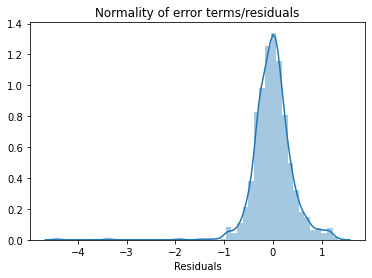

In [49]:
# Checking the normality of the error terms
sns.distplot(res_train)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")

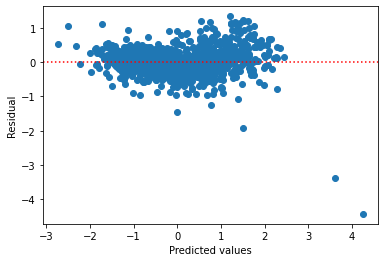

In [50]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred_train , res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted values")
plt.ylabel("Residual")
plt.show()

#### Applying model to test set

In [51]:
# Extracting variables from sellected model
col = X_train_rfe5.columns
X_test_5 = X_test[col]

In [52]:
# Making predictions on test set
y_pred_test = ridge.predict(X_test_5)

In [53]:
# Checking the model performance

rss = np.sum(np.square(y_test - y_pred_test))
print('RSS = ', rss)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_test ,y_pred_test))

RSS =  31.81317330410886
MSE =  0.11361847608610308
RMSE =  0.33707339866281805
r2 = 0.870298643276071


In [54]:
# Dataframe with features and coefficients
a = pd.DataFrame(ridge.coef_, X_train_rfe5.columns)
a = a.reset_index()
a['Coef'] = a[0] 
a['Featuees'] =  a['index']
a = a.drop(['index',0], 1)
a['abs_coef'] = a['Coef'].abs()
a

,Coef,Featuees,abs_coef
0,0.269681,OverallQual,0.269681
1,0.123926,OverallCond,0.123926
2,0.200668,YearBuilt,0.200668
3,0.232657,1stFlrSF,0.232657
4,0.281361,2ndFlrSF,0.281361
5,0.094529,BsmtFullBath,0.094529
6,0.120743,GarageCars,0.120743
7,0.066482,Neighborhood_ClearCr,0.066482
8,0.080944,Neighborhood_Crawfor,0.080944
9,0.078478,Neighborhood_NoRidge,0.078478


In [55]:
# Top 5 coefficients
a.nlargest(5, ['abs_coef']) 

,Coef,Featuees,abs_coef
4,0.281361,2ndFlrSF,0.281361
0,0.269681,OverallQual,0.269681
3,0.232657,1stFlrSF,0.232657
2,0.200668,YearBuilt,0.200668
1,0.123926,OverallCond,0.123926


In [56]:
print('r2_score on train set =', r2_score(y_train ,y_pred_train))
print('r2Oscore on test set =', r2_score(y_test ,y_pred_test))

r2_score on train set = 0.8426041520247021
r2Oscore on test set = 0.870298643276071


### Lasso regression

In [57]:
# Building Lidge regression model with alpha 10
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_rfe5, y_train)

# Making predictions using training set
y_pred_train_las = lasso.predict(X_train_rfe5)

In [58]:
# Checking the model performance

rss = np.sum(np.square(y_train - y_pred_train_las))
print('RSS = ', rss)

mse = mean_squared_error(y_train, y_pred_train_las)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_train ,y_pred_train_las))

RSS =  178.74581865927934
MSE =  0.15973710335949895
RMSE =  0.3996712440988205
r2 = 0.840262896640501


#### Making predictons on test set

In [59]:
# Making predictions on test set
y_pred_test_las = lasso.predict(X_test_5)

In [60]:
# Checking the model performance

rss = np.sum(np.square(y_test - y_pred_test_las))
print('RSS = ', rss)

mse = mean_squared_error(y_test, y_pred_test_las)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_test ,y_pred_test_las))

RSS =  32.6921296779649
MSE =  0.11675760599273179
RMSE =  0.34169812114311043
r2 = 0.8667151644102405


In [61]:
# Dataframe with features and coefficients
b = pd.DataFrame(lasso.coef_, X_train_rfe5.columns)
b = b.reset_index()
b['Coef'] = b[0] 
b['Featuees'] =  b['index']
b = b.drop(['index',0], 1)
b['abs_coef'] = b['Coef'].abs()
b

,Coef,Featuees,abs_coef
0,0.282714,OverallQual,0.282714
1,0.111196,OverallCond,0.111196
2,0.191976,YearBuilt,0.191976
3,0.237339,1stFlrSF,0.237339
4,0.242388,2ndFlrSF,0.242388
5,0.085067,BsmtFullBath,0.085067
6,0.123011,GarageCars,0.123011
7,0.059988,Neighborhood_ClearCr,0.059988
8,0.071079,Neighborhood_Crawfor,0.071079
9,0.070102,Neighborhood_NoRidge,0.070102


In [62]:
# Top 5 features
b.nlargest(5, ['abs_coef']) 

,Coef,Featuees,abs_coef
0,0.282714,OverallQual,0.282714
4,0.242388,2ndFlrSF,0.242388
3,0.237339,1stFlrSF,0.237339
2,0.191976,YearBuilt,0.191976
6,0.123011,GarageCars,0.123011


#### Residuel analysis

In [63]:
# Residual analyis
res_train_las = y_train - y_pred_train_las

Text(0.5, 0, 'Residuals')

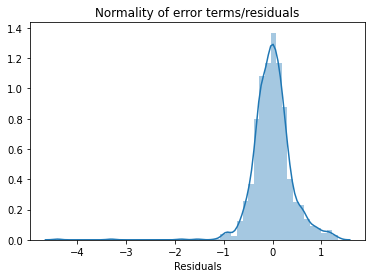

In [64]:
# Checking the normality of the error terms
sns.distplot(res_train_las)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")

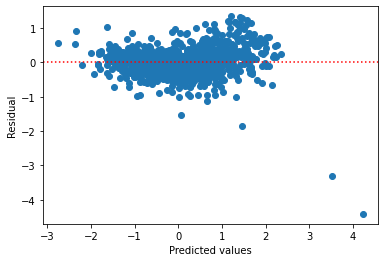

In [65]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred_train_las , res_train_las)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted values")
plt.ylabel("Residual")
plt.show()

In [66]:
print('r2_score on train set =', r2_score(y_train ,y_pred_train_las))
print('r2_score on test set =', r2_score(y_test ,y_pred_test_las))

r2_score on train set = 0.840262896640501
r2_score on test set = 0.8667151644102405


## Subjective Questions

### Doubling Lambda
#### Ridge Regression

Lambda was previously set to 10 <br>
Will now set lambda to 20

In [67]:
# Building Ridge regression model with alpha 10
ridge_d = Ridge(alpha=20)
ridge_d.fit(X_train_rfe5, y_train)

# Making predictions using training set
y_pred_train = ridge_d.predict(X_train_rfe5)

In [68]:
# Checking the model performance

rss = np.sum(np.square(y_train - y_pred_train))
print('RSS = ', rss)

mse = mean_squared_error(y_train, y_pred_train)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_train ,y_pred_train))

RSS =  176.24645221405245
MSE =  0.1575035319160433
RMSE =  0.39686714643069576
r2 = 0.8424964680839567


Predictions on test set

In [69]:
# Extracting variables from sellected model
col = X_train_rfe5.columns
X_test_5 = X_test[col]

In [70]:
# Making predictions on test set
y_pred_test = ridge_d.predict(X_test_5)

In [71]:
# Checking the model performance

rss = np.sum(np.square(y_test - y_pred_test))
print('RSS = ', rss)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_test ,y_pred_test))

RSS =  32.016432153666244
MSE =  0.11434440054880801
RMSE =  0.33814848890510807
r2 = 0.8694699630214566


In [72]:
# Dataframe with features and coefficients
a_d = pd.DataFrame(ridge_d.coef_, X_train_rfe5.columns)
a_d = a_d.reset_index()
a_d['Coef'] = a_d[0] 
a_d['Featuees'] =  a_d['index']
a_d = a_d.drop(['index',0], 1)
a_d['abs_coef'] = a_d['Coef'].abs()


In [73]:
# The most important predictor variable
a.nlargest(1, ['abs_coef']) 

,Coef,Featuees,abs_coef
4,0.281361,2ndFlrSF,0.281361


#### '2ndFlrSF' is the most important predictor variable after doubling the lambda value
<br><br><br>

#### Lasso regression

In [74]:
# Building Lidge regression model with alpha 0.02
lasso_d = Lasso(alpha=0.02)
lasso_d.fit(X_train_rfe5, y_train)

# Making predictions using training set
y_pred_train_las = lasso_d.predict(X_train_rfe5)

In [75]:
# Checking the model performance

rss = np.sum(np.square(y_train - y_pred_train_las))
print('RSS = ', rss)

mse = mean_squared_error(y_train, y_pred_train_las)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_train ,y_pred_train_las))

RSS =  185.693107430683
MSE =  0.16594558304797408
RMSE =  0.40736418969759
r2 = 0.834054416952026


#### Making predictions on test set

In [76]:
# Making predictions on test set
y_pred_test_las = lasso_d.predict(X_test_5)

In [77]:
# Checking the model performance

rss = np.sum(np.square(y_test - y_pred_test_las))
print('RSS = ', rss)

mse = mean_squared_error(y_test, y_pred_test_las)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_test ,y_pred_test_las))

RSS =  34.676756348266174
MSE =  0.1238455583866649
RMSE =  0.3519169765536538
r2 = 0.8586239007922436


In [78]:
# Dataframe with features and coefficients
b_d = pd.DataFrame(lasso_d.coef_, X_train_rfe5.columns)
b_d = b_d.reset_index()
b_d['Coef'] = b_d[0] 
b_d['Featuees'] =  b_d['index']
b_d = b_d.drop(['index',0], 1)
b_d['abs_coef'] = b_d['Coef'].abs()


In [79]:
# The most important predictor variable
b.nlargest(1, ['abs_coef']) 

,Coef,Featuees,abs_coef
0,0.282714,OverallQual,0.282714


#### The most important predictor after doubling the alpha value is 'OverallQual'
<br><br><br>

## Removing top 5 features

In [80]:
# The top 5 features in the Lasso model 
b.nlargest(5, ['abs_coef']) 

,Coef,Featuees,abs_coef
0,0.282714,OverallQual,0.282714
4,0.242388,2ndFlrSF,0.242388
3,0.237339,1stFlrSF,0.237339
2,0.191976,YearBuilt,0.191976
6,0.123011,GarageCars,0.123011


In [81]:
# Dropping the top 5 features of the Lasso model
X_5 = X_train_rfe5.drop(['OverallQual', '2ndFlrSF', '1stFlrSF', 'YearBuilt', 'GarageCars'],1)
X_5.head(3)

,OverallCond,BsmtFullBath,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,ExterQual_Gd,BsmtExposure_Gd,FireplaceQu_No_fireplace,SaleType_New,SaleCondition_Normal
66,-0.522185,1.140668,-0.154233,-0.199907,-0.160202,-0.184921,-0.256348,-0.171577,-0.284885,0.999107,-0.694348,3.321484,-0.993764,-0.254363,0.434926
141,-0.522185,1.140668,-0.154233,-0.199907,-0.160202,-0.184921,-0.256348,-0.171577,-0.284885,0.999107,1.440200,-0.301070,1.006275,-0.254363,0.434926
876,-0.522185,1.140668,-0.154233,-0.199907,-0.160202,-0.184921,-0.256348,-0.171577,-0.284885,0.999107,-0.694348,3.321484,1.006275,-0.254363,0.434926


In [82]:
# Building Lidge regression model with alpha 10
lasso_5 = Lasso(alpha=0.01)
lasso_5.fit(X_5, y_train)

# Making predictions using training set
y_pred_train_5 = lasso_5.predict(X_5)

In [83]:
# Checking the model performance

rss = np.sum(np.square(y_train - y_pred_train_5))
print('RSS = ', rss)

mse = mean_squared_error(y_train, y_pred_train_5)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_train ,y_pred_train_5))

RSS =  415.98674911232035
MSE =  0.37174865872414686
RMSE =  0.6097119473359095
r2 = 0.6282513412758532


In [84]:
X_t_5 = X_test_5[X_5.columns]

In [85]:
# Making predictions on test set
y_pred_test_5 = lasso_5.predict(X_t_5)

In [86]:
# Checking the model performance

rss = np.sum(np.square(y_test - y_pred_test_5))
print('RSS = ', rss)

mse = mean_squared_error(y_test, y_pred_test_5)
print('MSE = ', mse)

rmse = np.sqrt(mse)
print('RMSE = ', rmse)

print('r2 =', r2_score(y_test ,y_pred_test_5))

RSS =  99.22491354331314
MSE =  0.35437469122611837
RMSE =  0.5952937856437932
r2 = 0.5954629931330966


In [87]:
# Top 5 features after droping the previous top 5 features

b_5 = pd.DataFrame(lasso_5.coef_, X_t_5.columns)
b_5 = b_5.reset_index()
b_5['Coef'] = b_5[0] 
b_5['Featuees'] =  b_5['index']
b_5 = b_5.drop(['index',0], 1)
b_5['abs_coef'] = b_5['Coef'].abs()
b_5.nlargest(5, ['abs_coef']) 

,Coef,Featuees,abs_coef
10,0.412482,ExterQual_Gd,0.412482
12,-0.298551,FireplaceQu_No_fireplace,0.298551
5,0.174669,Neighborhood_NridgHt,0.174669
4,0.143893,Neighborhood_NoRidge,0.143893
11,0.126657,BsmtExposure_Gd,0.126657


### The end